In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
CASE_DIR = "/home/marsdenlab/projects/SV/UQ/data/2_vessel_data/coarse"
CSV_FILE = "aorta_group"
OUT_DIR  = "/home/marsdenlab/projects/SV/UQ/data/2_vessel_data/plots/coarse/group"

dirs = os.listdir(CASE_DIR)
df_fns = [CASE_DIR+'/'+d+'/'+CSV_FILE+'.csv' for d in dirs]

dataframes = []
for d in df_fns:
    if not os.path.exists(d): continue
    df_tmp = pd.read_csv(d)

    dataframes.append(df_tmp)
    
df = pd.concat(dataframes)

[18 21 11  0 26 25 28 10 20 31  1  7 29  9  5 27 24 23 16  4 19 12 14  3
  2 13 17  8  6 15]


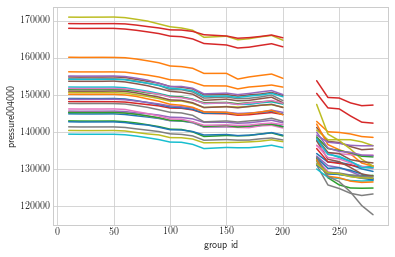

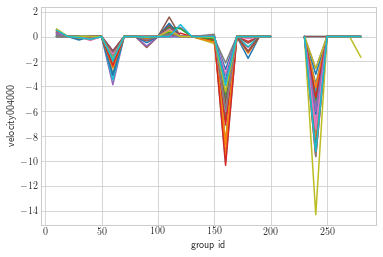

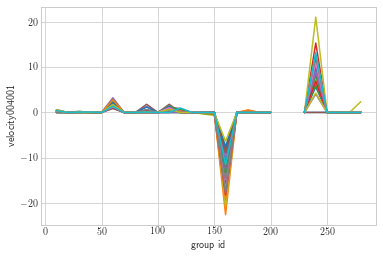

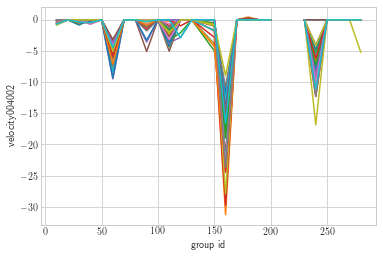

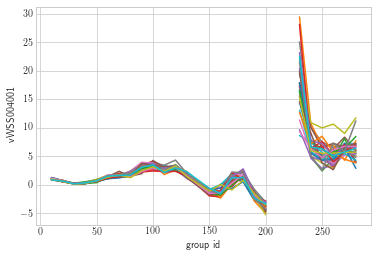

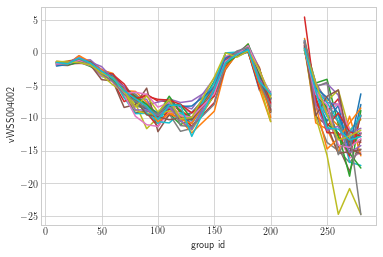

In [4]:
POINT_ID = 30 
labels   = ['pressure_00400_0', 
          'velocity_00400_0', 
          'velocity_00400_1',
          'velocity_00400_2',
           'vWSS_00400_1',
           'vWSS_00400_2']

model_ids = df['model_id'].unique()
print(model_ids)

for l in labels:
    plt.figure()
    for m in model_ids:
        data = df.loc[(df['model_id']==m) & (df['point_id']==POINT_ID)]
        
        plt.plot(data['group_id'], data[l])
    
    plt.xlabel('group id')
    plt.ylabel(l.replace('_',''))
    
    plt.savefig(OUT_DIR+'/'+CSV_FILE+'_'+l+str(POINT_ID)+'.png')
    
    plt.show()